# REGRESSION PROBLEM USING KERAS

We use a housing dataset from KAGGLE to predict house price using deep learning models. The data contains house sale prices for King Country which includes Seattle. It includes homes sold between May 2014 and May 2015. Project Objective is to use Keras libraries in TensorFlow to create a deep learning model to predict house prices. 

- First part of the project involves data preprocessing, Exploratory data analysis and Feature engineering. 
- Second part of the project trains the model, predicting our dependant variable on test data and performing evaluation metrics. 
- Third part of the project improves our model by removing outliers, using more epochs to our training set.

### Libraries

In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [214]:
# import dataset
df = pd.read_csv('kc_house_data.csv')

# EDA

In [215]:
# check if we have missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [216]:
# describe function to check statistical description of our dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


We need to get rid of the ID column which is a unique number of each house sold 

C:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of House Prices')]

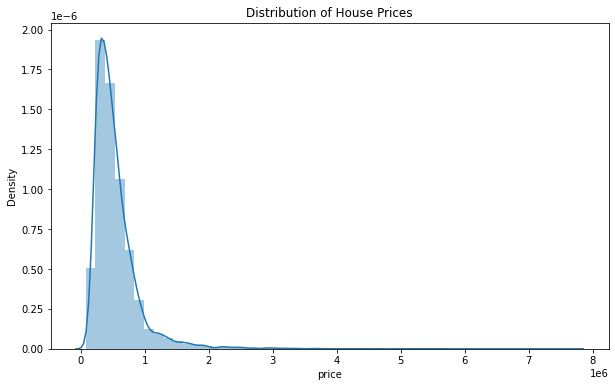

In [217]:
# plot the distribution of our predicting variable  PRICE
plt.figure(figsize=(10,6))
sns.distplot(df['price']).set(title= 'Distribution of House Prices')

From the distribution plot, we notice that our dataset has outliers i.e., houses that are priced beyond 2million.  We may decide to remove outliers and predict only for houses between 0 to 2 million/ 3 million.

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


C:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Number of bedrooms')]

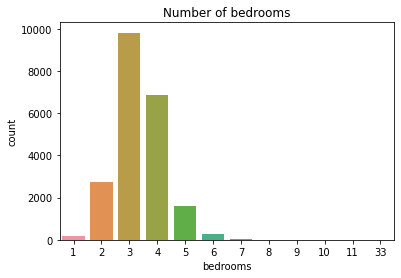

In [218]:
# plot for number of bedrooms
print(df['bedrooms'].value_counts())

# plot bedroom count
sns.countplot(df['bedrooms']).set(title= 'Number of bedrooms')

Most houses have 2 to 5 bedrooms. We also have houses that have 8,9 ... upto 33 bedrooms.

In [219]:
# plotting correlation of independant variables to a PRICE Variable
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

This shows us the level of correlation of independant variables with the predicting variable ~ PRICE. i.e.,
- zipcode and id, are negatively correlated. These can be dropped from our dataset since they do not have any relationship with the dependant variable.

- variables that highly positively correlated include sqft_living, grade, sqft_above 


[Text(0.5, 1.0, 'Scatter plot: House Price vs sqft_living')]

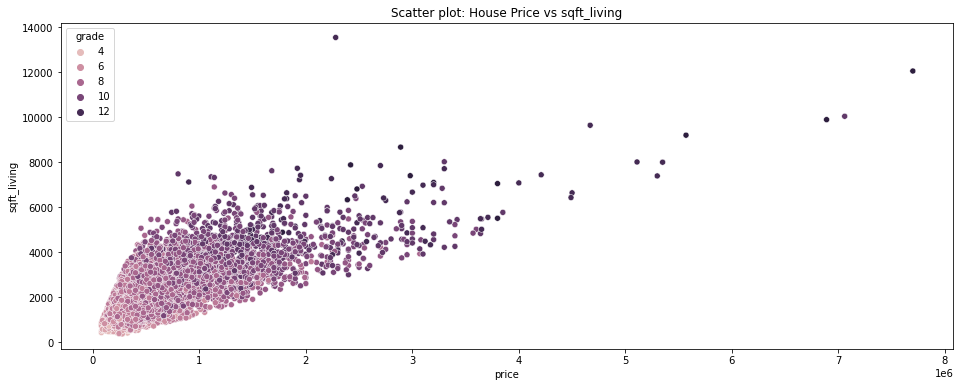

In [220]:
# We explore highly correlated features using a scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot(data= df, x= df['price'], y=df['sqft_living'], hue='grade').set(title= 'Scatter plot: House Price vs sqft_living')

Plot shows correlation of square footage of the apartment interior living space vs dependant variable House Price. 
- We set hue to grade (shows the quality level of constrution & design ) which is a categorical variable ranging between 1 to 13. 
- We notice that the house price increases with increase in the squarefootage of the apartment interior living space.
- The notice the same trend for grade variable, where the more expensive the house is, the higher the grade.

[Text(0.5, 1.0, 'Scatter plot: Sqft above vs Price')]

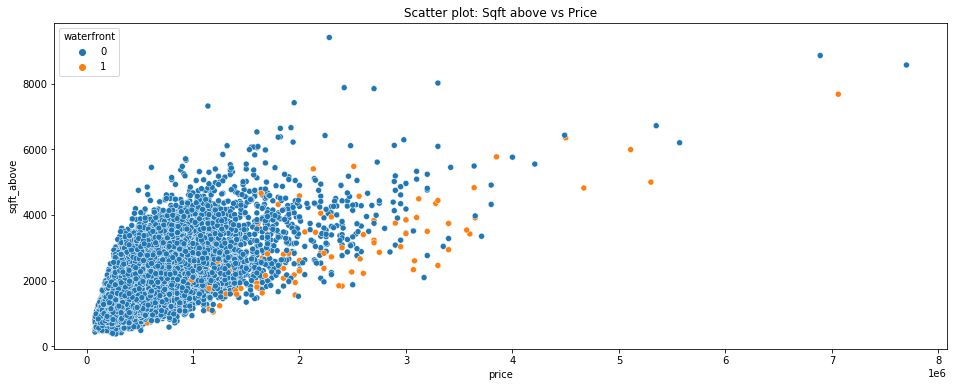

In [221]:
# We explore highly correlated features using a scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot(data= df, x= df['price'], y=df['sqft_above'], hue='waterfront').set(title= 'Scatter plot: Sqft above vs Price')

Plot shows correlation of square footage of the interiorhousing space that is above ground level vs dependant variable House Price. 
- Variable waterfront (A dummy variable for whether the apartment was overlooking the waterfront or Not) is used to identify houses that are in a waterfront . 
- We see that most houses do not have a waterfront. Houses with a waterfront are located in house area that is expensive.

[Text(0.5, 1.0, 'Scatter plot: House Price vs sqft_living15')]

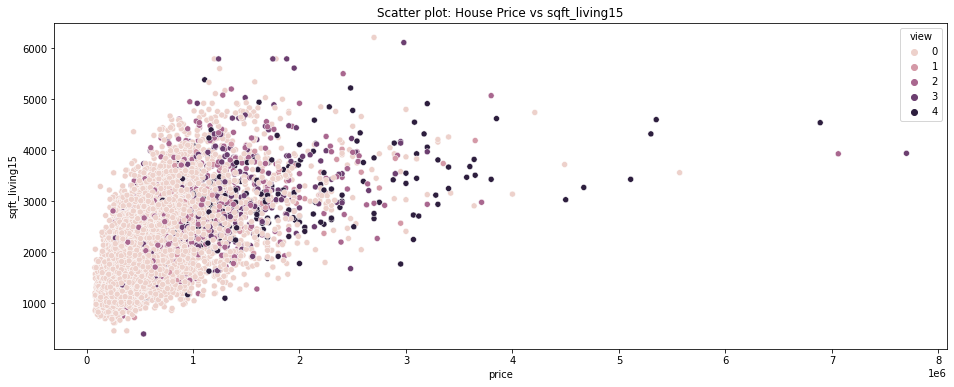

In [222]:
# We explore highly correlated features using a scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot(data= df, x= df['price'], y=df['sqft_living15'], hue='view').set(title= 'Scatter plot: House Price vs sqft_living15')

Plot shows correlation of square footage of interior housing living space for the nearest 15 neighbors vs dependant variable House Price. 
- We set hue to view (Index how good the view of the property is) which is a categorical variable ranging between 0 to 4. 
- We notice that the house price increases with increase in the squarefootage of interior housing living space for the nearest 15 neighbors.
- The notice the same trend for view categorical variable, where the more expensive the house is, the higher the view.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

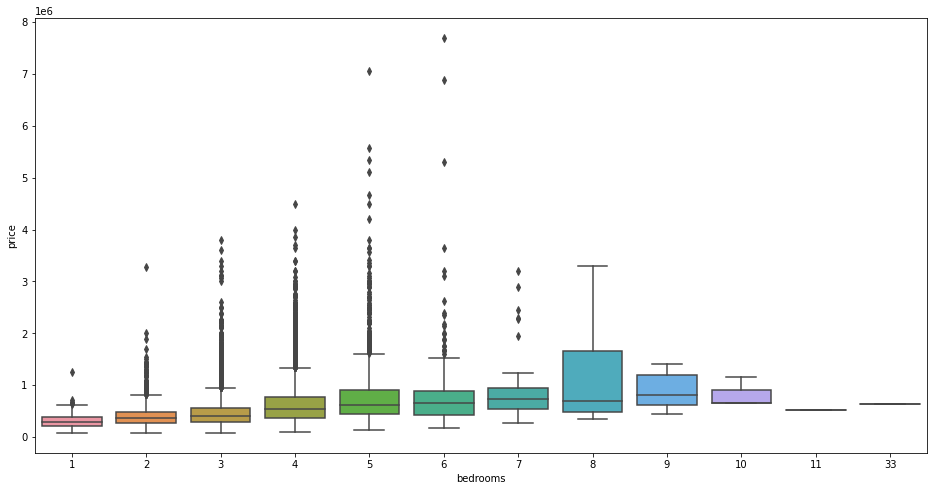

In [223]:
# boxplot for Houses price based on the number of bedrooms
plt.figure(figsize=(16,8))
sns.boxplot(data=df , x='bedrooms', y='price')

Shows the distribution of House prices per number of bedrooms an apartment has. There is quite a large variety of house prices for apartments with bedrooms between 3 and 7.

<AxesSubplot:xlabel='price', ylabel='long'>

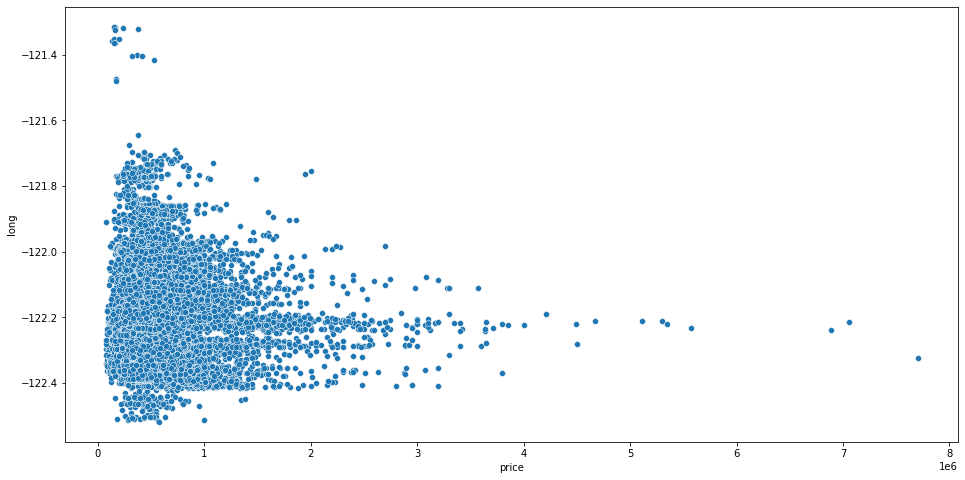

In [224]:
# Plotting langitude
plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x='price', y='long')

<AxesSubplot:xlabel='price', ylabel='lat'>

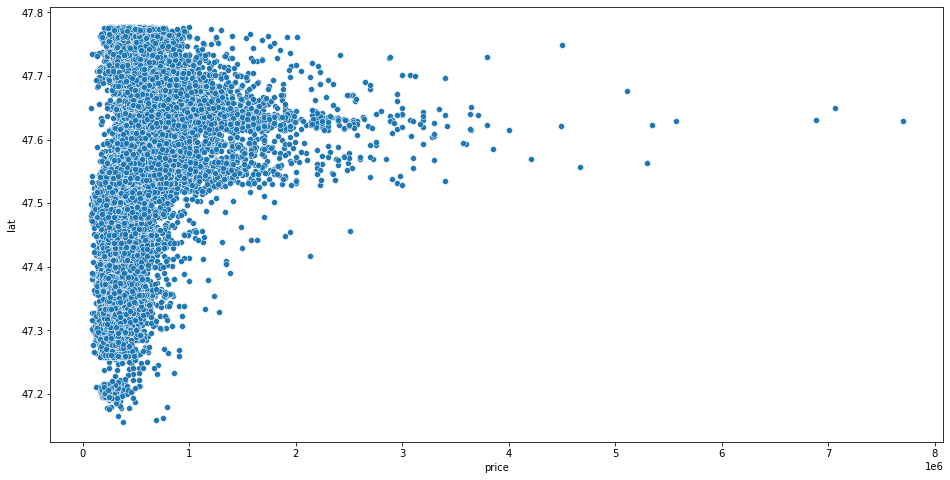

In [225]:
# Plotting langitude 
plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x='price', y='lat')

<AxesSubplot:xlabel='long', ylabel='lat'>

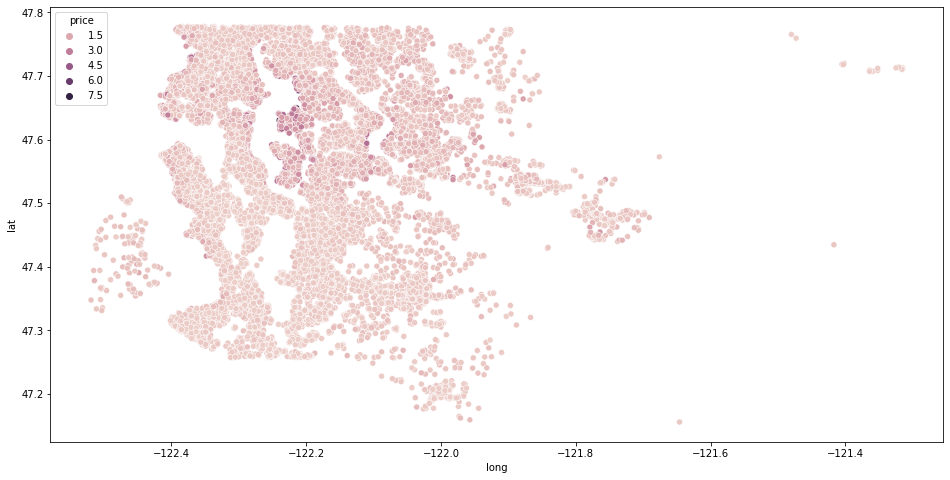

In [226]:
# Plotting langitude and longitude
plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x='long', y='lat', hue='price')

We plot both latitude and longitude together and set colour to determine house price. 
- More expensive houses have dark colors and this helps to identify expensive housing area.

- We note that color grading is not significant and this is because of outlier (house prices beyond 3 million). 
- To improve our plot, we can consider dropping houses that have price beyond 3 million.

In [227]:
# top 20 most expensive houses
df.sort_values('price', ascending = False).head(20) # sort houses by price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


We note that the most expensive houses are above 3 million. We can consider removing the top 1% of the most expensive houses in our dataset. 

In [228]:
# removing  top 1 % of most expensive houses
print('Number of houses to drop : ',len(df)*0.01)

Number of houses to drop :  215.97


In [229]:
# create another dataset without outliers
non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:] # start at 216 to first

<AxesSubplot:xlabel='long', ylabel='lat'>

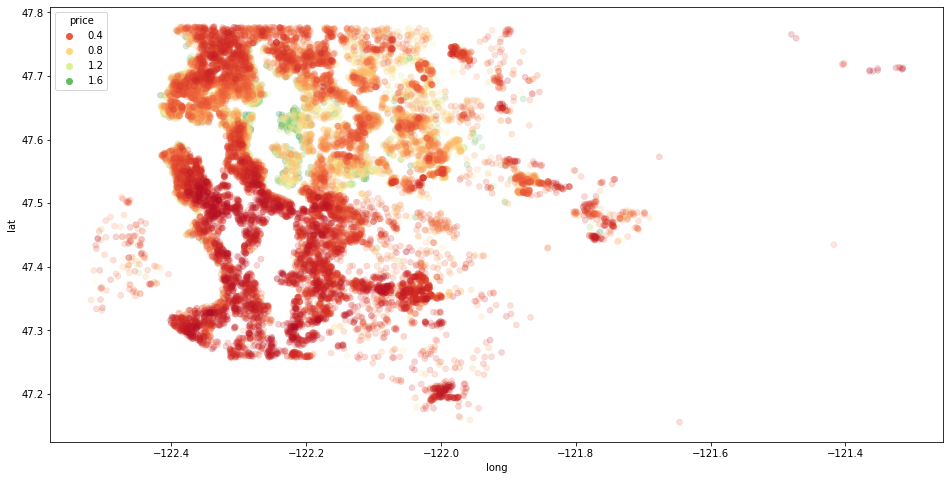

In [230]:
# Plotting langitude and longitude without outliers
plt.figure(figsize=(16,8))
sns.scatterplot(data=non_top_1_perc, x='long', y='lat', hue='price', edgecolor=None, alpha=0.2, palette='RdYlGn')

- Most expensive houses have a colour yellow to green. 
- This plot helps us identify housing area that has expensive prices.
- The dark red colour shows that there are more houses in that area.

# Data preprocessing

In [231]:
# drop id column
df = df.drop('id', axis=1)

In [232]:
# convert datetime from str object to a datetime object
df['date'] = pd.to_datetime(df['date'])
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [233]:
# extract year and month from datetime,
# create a new column for year and month
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

# drop out date column
df = df.drop('date', axis=1)

In [234]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


We have new columns month and year that were extracted from date string. We want to perform feature engineering to check if we can get more information / any relationship between the variables and our predicting variable ~ PRICE. 

We want to check if these are useful feature. check if there is any variation in price based on the month of sale of the house.

<AxesSubplot:xlabel='year'>

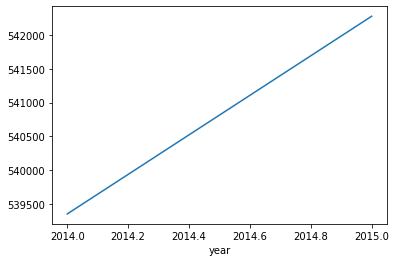

In [235]:
# plot the mean house price based on year
df.groupby('year').mean()['price'].plot()

We expect mean house price to increase from 2014 to 2015. This is natural for houses because of inflation which increases market price for houses

<AxesSubplot:xlabel='month'>

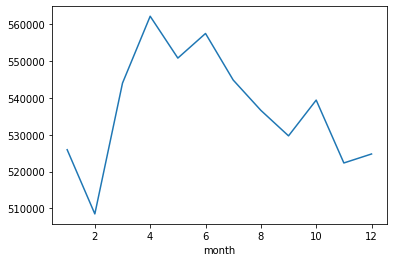

In [236]:
# plot mean house price based on month
df.groupby('month').mean()['price'].plot()

The mean house prices varies based on the month of sale.

- pLot shows that houses that were sold in April where expensive based on average sales. The same is the case for houses sold in June
- House price decreases gradually after June sales, until October where we see a hike in houses prices again and then a drop in November.

In [244]:
# explore zipcode to see if we can keep this variable
print(df['zipcode'].value_counts().head())
print('Total of unique zipcode values: ',len(df['zipcode'].value_counts()))

# drop this value
df = df.drop('zipcode', axis=1)

98103    602
98038    589
98115    583
98052    574
98117    553
Name: zipcode, dtype: int64
Total of unique zipcode values:  70


We realise that we have 70 unique values for Zip code. We will drop this value in this project

In [128]:
# year renovated column

df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

Year renovated shows the year in which the house was renovated. 20683 houses were not renovated as shown by year = 0. 
- We can consider to have this feature as a binary : house is renovated or Not renovated. This can be achieved by using an apply function to converted houses with year renovated != 0 to 1. This results in a dummy binary variable of either 1 or 0.

- Intuitively, the more recent the year of renovation, the higher the house price. We can also decide to leave the values as they are because coincedentally as the year of renovation increases, the expect house price to increase as well.

In [245]:
# inspect our dataset once more
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


# Building the model ~ Deep learning model

In [258]:
#pip install tensorflow
# seperte features from our label
# we include values method to return the numpy array instead of a dataframe

X = df.drop('price', axis=1).values
y = df['price'].values

In [259]:
# split data into train and test
from sklearn.model_selection import train_test_split

seed = 7000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

In [263]:
# scaling data to prevent data leakage

from sklearn.preprocessing import MinMaxScaler

# create an instance of the scaler
scaler = MinMaxScaler()

# scale the training set
X_train = scaler.fit_transform(X_train)

# scale the test set
# we only set to transform because we dont want to assume prior information
X_test = scaler.transform(X_test)

In [264]:
# create the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# we create a sequential model
model = Sequential()

# we base the number of neurons from the size of input data
# activation = rectified linier unit
# we create a deep learning network by adding a couple of Dense layers
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

# one more final layer that has 1 neuron to directly output our predicted price 
model.add(Dense(1))

# compile the model using adam optimiser, and choose mean sqaured error as our loss since this is a regression problem
model.compile(optimizer='adam', loss='mse')

In [265]:
# model.fit?

In [266]:
# train the model
# we pass in validation data, to check our loss on the test data
# this helps keep a track on how well the model is performing not only on train data but also on test data

model.fit(x=X_train, y=y_train, 
          validation_data = (X_test, y_test), # test data does not affect bias.
          batch_size = 128 ,   # fit data in batch sizes since this is a larger dataset
         epochs =400, # compare training performance and test performance. prints the results
          verbose=0
         )


# Evaluation of the model

In [267]:
# explore model history of losses (mse)
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,4.180313e+11,4.474753e+11
1,4.176814e+11,4.461246e+11
2,4.118715e+11,4.315798e+11
3,3.786670e+11,3.697671e+11
4,2.822975e+11,2.350454e+11


<AxesSubplot:>

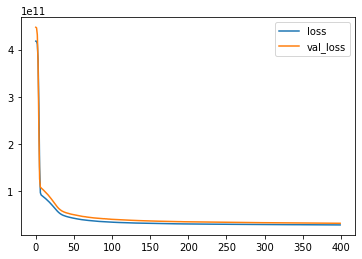

In [268]:
# compare loss on training vs loss on validation to see if our model is overfitting / biased
losses.plot()

- There is decrease in training loss as well as validation loss. 
- This shows that there is NO overfitting occuring in our test data

- Since validation loss continues to going down, this is an indication that we could continue training without overfitting to the training data i.e., using more epochs (+400) and then applied early stoppage.

- If validation loss starts to go up, it means that we are now overfitting to the training data as we will now have a lager loss for our validation data.  

In [269]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# predict on test data
predictions = model.predict(X_test)

# mean squared error
print('Mean Squared Error: ',mean_squared_error(y_test, predictions))

# root mean squared error
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test, predictions)))

# mean absolute error
print('Mean Absolute Error: ',mean_absolute_error(y_test, predictions))

203/203 [==============================] - 0s 2ms/step
Mean Squared Error:  31787573846.67389
Root Mean Squared Error:  178290.70039313292
Mean Absolute Error:  107517.60327932099


In [172]:
# compare with dependant variable ~ PRICE
print(df['price'].describe())

print('Average price of House: ',5.402966e+05)

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64
Average price of House:  540296.6


Compare the mean absolute value **(107,517.60)** vs the Average price of the house **(540,296.6)**. 

- The results of our model are not great!!! This is because our dataset contains outliers. 
- To improve our model, we may consider removing ourliers such that our dataset only predicts house prices between 0- 2 million.
- Also, to improve our model, we may include more epochs and set early stoppage when our model is now overfitting on training data

In [270]:
# 
explained_variance_score(y_test, predictions)

0.7876519064329364

This metric measure tells us how much variance is being explained. The best possible score is 1, therefore a value closer to 1 means that our model is good. For this model, our variance score is **0.78**, which is not bad

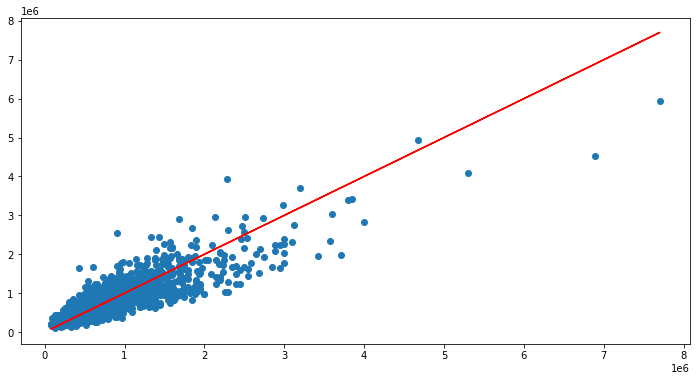

In [271]:
# compare our predictions against a perfect fit using a scatter plot
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

This plot shows that our model is not good in predicting expensive houses. Our model can be improved by removing outliers perhaps.

C:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

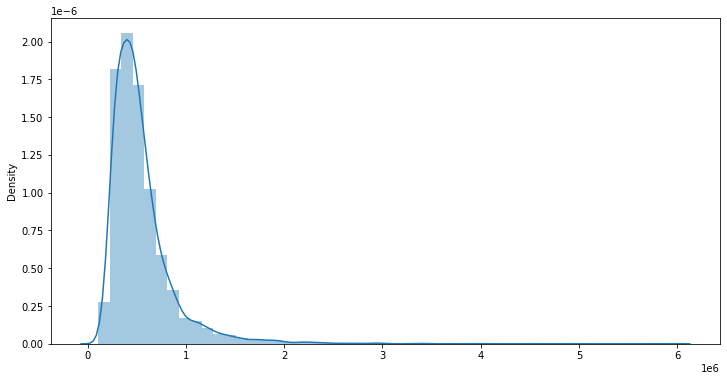

In [272]:
# can also plot the distribution of our predictions variable.
# we should get a fairly normal distribution plot
plt.figure(figsize=(12,6))
sns.distplot(predictions)

Our predictions follow a normally distribution. This is similar to the plot for house price variable on our dataset

In [273]:
# passing in new data, 1. we pass data that is in array form, 2. scale the data

# Improving our Model

In [287]:
# new dataset with  house prices less than 2 mln
df2 = df[df['price'] < 2000000]

# count of new data
x = df['price'].count()
x1 = df2['price'].count()

# % of data removed
print(round(((x-x1)/x)*100,3),'%')

0.963 %


About less than 1% of the data was removed for the most expensive houses

[Text(0.5, 1.0, 'Scatter plot: House Price vs sqft_living')]

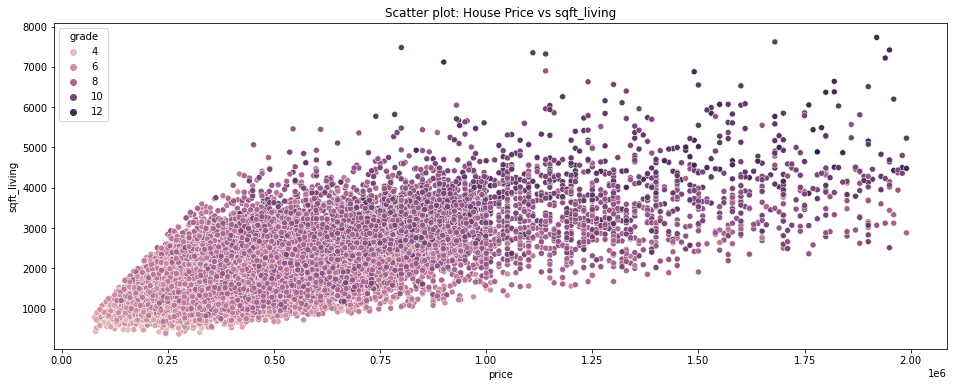

In [315]:
# We explore highly correlated features using a scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot(data= df2, x= 'price', y='sqft_living', hue='grade').set(title= 'Scatter plot: House Price vs sqft_living')

We can note the change in our plot from the previous plots.

In [305]:
# Step 1
# seperte features from our label
X = df2.drop('price', axis=1).values
y = df2['price'].values

# Step 2
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

# Step 3 
# scaling data to prevent data leakage
scaler = MinMaxScaler()

# scale the training set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [306]:
# Step 4
# we create a sequential model
model = Sequential()

# we create a deep learning network by adding a couple of Dense layers
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

# one more final layer that has 1 neuron to directly output our predicted price 
model.add(Dense(1))

# compile the model using adam optimiser, and choose mean sqaured error as our loss since this is a regression problem
model.compile(optimizer='adam', loss='mse')

In [307]:
# Step 5
# train the model
model.fit(x=X_train, y=y_train, 
          validation_data = (X_test, y_test), # test data does not affect bias.
          batch_size = 128 ,   # fit data in batch sizes since this is a larger dataset
         epochs =900, # compare training performance and test performance.
          verbose=0
         )


<AxesSubplot:>

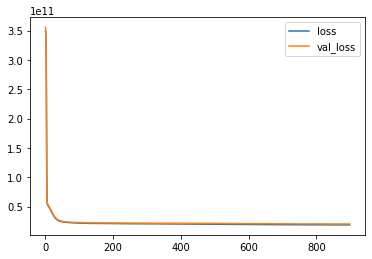

In [308]:
# Step 6 
# explore model history of losses (mse)
losses = pd.DataFrame(model.history.history)
losses.head()

# compare loss on training vs loss on validation to see if our model is overfitting 
losses.plot()

In [309]:
# Step 6 
# predict on test data
predictions = model.predict(X_test)

# mean squared error
print('Mean Squared Error: ',mean_squared_error(y_test, predictions))

# root mean squared error
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test, predictions)))

# mean absolute error
print('Mean Absolute Error: ',mean_absolute_error(y_test, predictions))

#
print('explained_variance_score: ',explained_variance_score(y_test, predictions))

201/201 [==============================] - 0s 2ms/step
Mean Squared Error:  20256394063.79238
Root Mean Squared Error:  142324.95938447473
Mean Absolute Error:  95495.91399553919
explained_variance_score:  0.7588414377177977


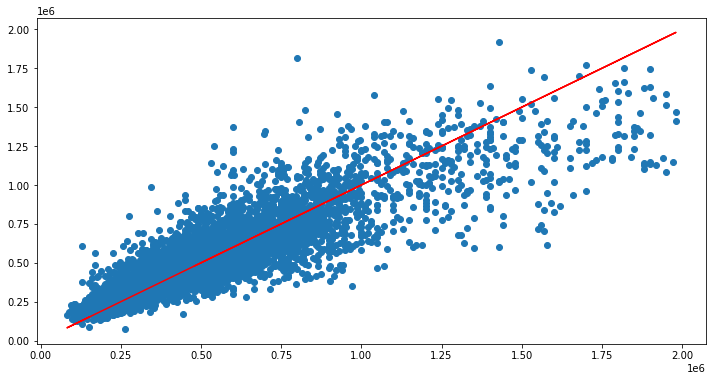

In [310]:
# compare our predictions against a perfect fit using a scatter plot
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

C:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

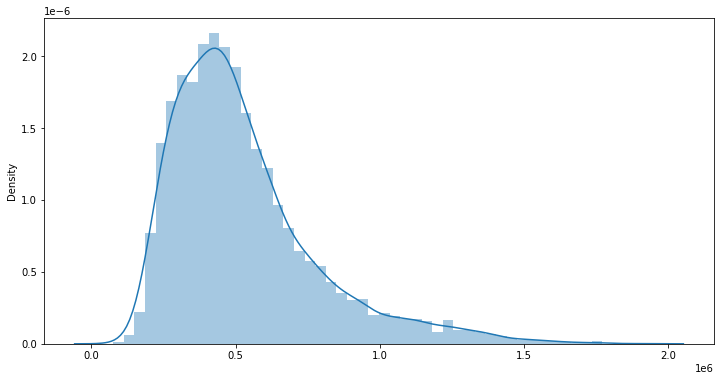

In [311]:
# we should get a fairly normal distribution plot
plt.figure(figsize=(12,6))
sns.distplot(predictions)

## Concusion

We see some improvement in our model based on results of our Evaluation metrics.

1. Root mean squared error reduced from **178 290** to **142324**
2. Mean absolute error reduced from **31 787 573 846** to  **20 256 394 063**
3. Explained variance of ur model reduced from **0.78** to **0.75**
4. Mean absolute error reduced from **107 517** to **95495** which is good because the average house price after removing some top expensive houses was **518914.6**